In [1]:
import sklearn

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Dependencies and Setup
import pandas as pd

In [38]:
# File to Load
file_to_load = "NBA_Shooting_Stats_1984-2019.csv"

# Read .csv File and store into Pandas data frame
nba_df = pd.read_csv(file_to_load)
# nba_df

# Convert to json
nba_df.to_json(r'nba_stats.json')

nba_df

,SEASON,#,PLAYER,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
0,1984-85,1,Bernard King,55,37.5,32.9,12.6,23.7,53.0,0.0,...,10.0,77.2,2.1,3.7,5.8,3.7,1.3,0.3,3.7,26.8
1,1984-85,2,Larry Bird,80,39.5,28.7,11.5,22.0,52.2,0.7,...,5.7,88.2,2.1,8.5,10.5,6.6,1.6,1.2,3.1,34.4
2,1984-85,3,Michael Jordan,82,38.3,28.2,10.2,19.8,51.5,0.1,...,9.1,84.5,2.0,4.5,6.5,5.9,2.4,0.8,3.5,29.2
3,1984-85,4,Purvis Short,78,39.5,28.0,10.5,22.8,46.0,0.6,...,7.9,81.7,2.0,3.1,5.1,3.0,1.5,0.3,3.1,21.1
4,1984-85,5,Alex English,81,36.1,27.9,11.6,22.4,51.8,0.0,...,5.7,82.9,2.5,3.1,5.7,4.2,1.2,0.6,3.1,24.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7115,2019-20,259,Anthony Tolliver,47,15.6,3.5,1.1,3.3,34.8,0.8,...,0.5,72.0,0.6,2.2,2.8,0.7,0.3,0.2,0.6,4.7
7116,2019-20,260,Rodney McGruder,50,15.0,3.2,1.2,3.1,39.1,0.4,...,0.6,53.6,0.5,2.0,2.6,0.6,0.5,0.2,0.4,4.4
7117,2019-20,261,Semi Ojeleye,61,14.6,3.1,1.1,2.6,40.9,0.6,...,0.5,89.3,0.4,1.6,2.0,0.5,0.3,0.1,0.2,4.3
7118,2019-20,262,Matthew Dellavedova,57,14.4,3.1,1.1,3.1,35.4,0.4,...,0.6,86.5,0.3,1.0,1.3,3.2,0.4,0.0,1.0,4.9


In [5]:
scoring_df = nba_df[['SEASON','PLAYER','GP','PTS']]
scoring_df

,SEASON,PLAYER,GP,PTS
0,1984-85,Bernard King,55,32.9
1,1984-85,Larry Bird,80,28.7
2,1984-85,Michael Jordan,82,28.2
3,1984-85,Purvis Short,78,28.0
4,1984-85,Alex English,81,27.9
...,...,...,...,...
7115,2019-20,Anthony Tolliver,47,3.5
7116,2019-20,Rodney McGruder,50,3.2
7117,2019-20,Semi Ojeleye,61,3.1
7118,2019-20,Matthew Dellavedova,57,3.1


In [43]:
# Filter by Season
season_df = scoring_df.loc[scoring_df['SEASON'] == '1990-91']
season_df

,SEASON,PLAYER,GP,PTS
1044,1990-91,Michael Jordan,82,31.5
1045,1990-91,Karl Malone,82,29.0
1046,1990-91,Bernard King,64,28.4
1047,1990-91,Charles Barkley,67,27.6
1048,1990-91,Patrick Ewing,81,26.6
...,...,...,...,...
1236,1990-91,Lester Conner,74,3.5
1237,1990-91,Larry Smith,81,3.3
1238,1990-91,Jud Buechler,74,3.1
1239,1990-91,Kenny Williams,75,2.9


In [44]:
# Select Top and Bottom PTS scored per game
top = season_df.nlargest(50,'PTS', keep='all')
top
bottom = season_df.nsmallest(50,'PTS')
bottom

frames = [top,bottom]
top_bottom_df = pd.concat(frames)
top_bottom_df

# top_bottom= [(season_df.nlargest(50,'PTS',keep='all')) | (season_df.nsmallest(50,'PTS'))]
# NOT WORKING WHEN COMBINED WITH OR STATEMENT

# df.nlargest(#, 'column_name',keep ='all')
#     keep = 'all' keeps duplicate values
    
#  df[(df.column_name >= 200) | (df.column_name == 'Value')]
#     | = OR

,SEASON,PLAYER,GP,PTS
1044,1990-91,Michael Jordan,82,31.5
1045,1990-91,Karl Malone,82,29.0
1046,1990-91,Bernard King,64,28.4
1047,1990-91,Charles Barkley,67,27.6
1048,1990-91,Patrick Ewing,81,26.6
...,...,...,...,...
1195,1990-91,Billy Thompson,73,6.8
1194,1990-91,Duane Causwell,76,6.9
1192,1990-91,Kelly Tripucka,77,7.0
1193,1990-91,Muggsy Bogues,81,7.0


In [45]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = season_df.GP.values.reshape(-1, 1)
y = season_df.PTS.values.reshape(-1, 1)
 
print("Shape: ", X.shape, y.shape)
X

Shape:  (197, 1) (197, 1)


array([[82],
       [82],
       [64],
       [67],
       [81],
       [66],
       [81],
       [82],
       [82],
       [77],
       [82],
       [82],
       [77],
       [80],
       [77],
       [76],
       [82],
       [78],
       [78],
       [80],
       [77],
       [74],
       [76],
       [80],
       [77],
       [79],
       [80],
       [79],
       [81],
       [73],
       [74],
       [80],
       [77],
       [79],
       [82],
       [82],
       [78],
       [82],
       [77],
       [70],
       [82],
       [79],
       [82],
       [81],
       [82],
       [81],
       [81],
       [80],
       [81],
       [75],
       [75],
       [82],
       [73],
       [82],
       [81],
       [70],
       [82],
       [82],
       [73],
       [80],
       [79],
       [81],
       [81],
       [73],
       [82],
       [82],
       [82],
       [75],
       [78],
       [70],
       [72],
       [70],
       [75],
       [79],
       [77],
       [79],
       [72],

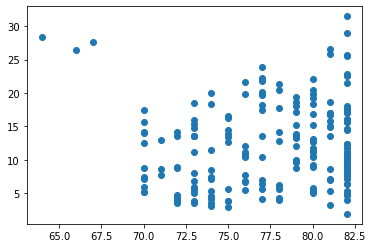

In [46]:
# Plot the data

### BEGIN SOLUTION

plt.scatter(X, y)

### END SOLUTION

In [47]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression

### BEGIN SOLUTION

model = LinearRegression()

### END SOLUTION

In [48]:
# Fit the model to the data. 
# Note: This is the training step where you fit the line to the data.

### BEGIN SOLUTION

model.fit(X, y)

### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
# Print the coefficient and the intercept for the model

### BEGIN SOLUTION
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
### END SOLUTION

Weight coefficients:  [[0.15629908]]
y-axis intercept:  [0.0796937]


In [50]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[64]]
Max X Value: [[82]]


In [51]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

### BEGIN SOLUTION
y_min = model.predict(x_min)
y_max = model.predict(x_max)
### END SOLUTION

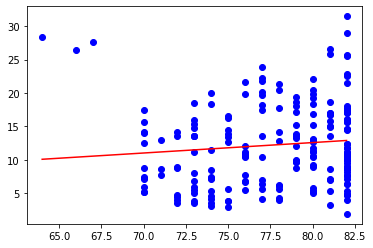

In [52]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

### BEGIN SOLUTION
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
### END SOLUTION